In [14]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

In [8]:
df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [10]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)

In [12]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


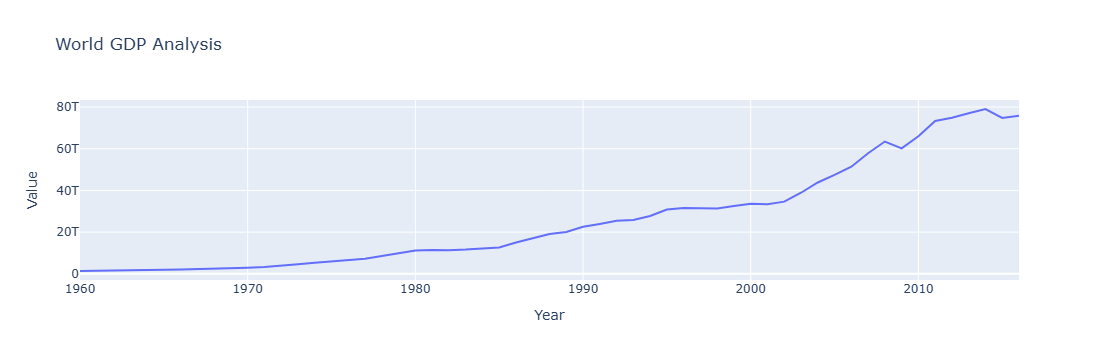

In [24]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig

## Save in an Offline Mode

In [28]:
pyo.plot(fig,filename = 'World GDP.html')

'World GDP.html'

In [31]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP Analysis')

fig
pyo.plot(fig,filename = 'India GDP.html')

'India GDP.html'